In [1]:
import tensorflow as tf

/home/neha/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Class for running tensorflow operations

In [10]:
sess = tf.Session() #encapsulates the environment in which operations are executed

# TensorFlow basics

In [5]:
hello = tf.constant('HEllo')

In [6]:
type(hello)

tensorflow.python.framework.ops.Tensor

In [7]:
x= tf.constant(100)

In [8]:
x

<tf.Tensor 'Const_2:0' shape=() dtype=int32>

In [13]:
sess.run(hello) #b is just a unicode indication

b'HEllo'

In [14]:
type(sess.run(x))

numpy.int32

In [15]:
#Operations

In [20]:
x = tf.constant(3)
y = tf.constant(4)

In [21]:
with tf.Session() as sess:
    print('Operations with constants')
    print('Addition: ,', sess.run(x+y))
    print('Subtraction: ,', sess.run(x-y))
    print('Mutiplication: ,' ,sess.run(x*y))
    print('Division: ,', sess.run(x/y))

Operations with constants
Addition: , 7
Subtraction: , -1
Mutiplication: , 12
Division: , 0.75


In [22]:
x = tf.placeholder(tf.int32)

In [23]:
y = tf.placeholder(tf.int32)

In [25]:
add = tf.add(x,y)

In [26]:
sub = tf.subtract(x,y)

In [27]:
mul = tf.multiply(x,y)

In [29]:
with tf.Session() as sess: 
    print('Opertaions with placeholders')
    print('Addition : ', sess.run(add,feed_dict={x:4,y:4}))

Opertaions with placeholders
Addition :  8


In [30]:
import numpy as np

In [33]:
a = np.array([[5.0,5.0]])

In [34]:
a.shape

(1, 2)

In [36]:
b = np.array([[2.0],[2.0]])

In [37]:
b.shape

(2, 1)

In [38]:
mat1 = tf.constant(a)

In [39]:
mat2 = tf.constant(b)

In [40]:
matrix_mul = tf.matmul(mat1,mat2)

In [44]:
with tf.Session() as sess:
    result = sess.run(matrix_mul)

In [45]:
print(result)

[[20.]]


# MNIST Multi - layer perceptron

In [1]:
import tensorflow as tf

/home/neha/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("/tmp/data",one_hot = True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
type(mnist.train.images)

numpy.ndarray

In [6]:
mnist.train.images.shape

(55000, 784)

In [34]:
sample = mnist.train.images[2].reshape(28,28)

In [35]:
import matplotlib.pyplot as plt

In [36]:
%matplotlib inline

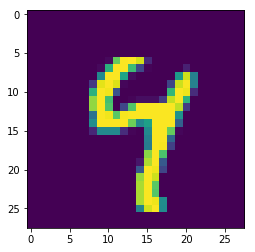

In [37]:
plt.imshow(sample)

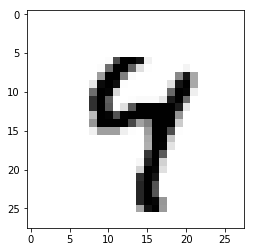

In [39]:
plt.imshow(sample,cmap="Greys")

In [40]:
learning_rate = 0.001 #how quickly we adjust the cost function

In [41]:
training_epochs = 15 # training cycles

In [42]:
batch_size = 100  #size of the batches of training data

In [43]:
#NEtwork parameters / paramaters taht directly define how the neural network will look like

In [44]:
n_classes = 10 #expected output classes ( 0 to 9 in MNIST digit data case)

In [78]:
n_samples = mnist.train.num_examples
s_samples

55000

In [46]:
n_input = 784 #input will look like

In [48]:
# 2 hidden layers
n_hidden_1 = 256
n_hidden_2 = 256

In [49]:
#First we provide input to the 1st hidden layer 
# also add a bias value with the input 
# more the hidden layers , the longer will the model take to run , but gives accurate results
# the input is then passed to the 2nd hidden layer and so on
# loss or cost function will help to determine how far we are we from the correct output/classification clas
# an optimisation function is used to minimize the loss by adjusting the weight values accross the network
# and changing the learning rate parameter(which tells how quickly you want to apply the optimization) .The lower the rate,
# higher is the accuracy of training result
#

In [56]:
def multilayer_perceptron(x,weights,biases):
    
    '''
    x:Placeholder for data input
    weights : dictionary for weights
    biases : dict of bias values
    '''
    #First hidden Layer activation RELU activation 
    #x*w + bias
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    # RELU(x*w+bias) -> f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1) 
    
    
    #Second hidden layer
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2 = tf.nn.relu(layer_2) 
    
    #Output layer
    out_layer = tf.matmul(layer_2,weights['out']) + biases['out']
    
    return out_layer


In [57]:
weights= {
    'h1': tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

In [58]:
biases= {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [59]:
x = tf.placeholder('float',[None,n_input])
y = tf.placeholder('float',[None, n_classes])

In [60]:
pred = multilayer_perceptron(x,weights,biases)

In [62]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits( logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Training the model

In [66]:
t = mnist.train.next_batch(1) 

In [67]:
Xsamp , ysamp = t

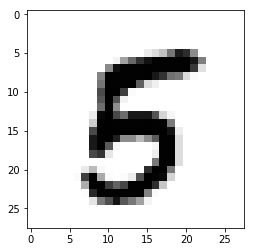

In [68]:
plt.imshow(Xsamp.reshape(28,28),cmap='Greys')

In [69]:
ysamp

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

# Run the session

In [70]:
sess = tf.InteractiveSession()

In [76]:
#initializing variables
init = tf.initialize_all_variables()

In [77]:
sess.run(init)

In [84]:
#15 epochs
for epoch in range(training_epochs):
        #cost
    avg_cost= 0.0
     
    total_batch = int(n_samples/batch_size) #55000/100 batches total
        
    for i in range(total_batch):
            
        batch_x,batch_y = mnist.train.next_batch(batch_size)
            
        _,c = sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
            
        avg_cost += c/total_batch
            
    print("Epoch : {}  cost{:4f}".format(epoch+1,avg_cost ) ) 
        
print("Model has completed {} epochs of training".format(training_epochs))

Epoch : 1  cost42.728860
Epoch : 2  cost27.063458
Epoch : 3  cost18.936561
Epoch : 4  cost13.548585
Epoch : 5  cost10.125730
Epoch : 6  cost7.455104
Epoch : 7  cost5.621616
Epoch : 8  cost4.194634
Epoch : 9  cost3.318705
Epoch : 10  cost2.383097
Epoch : 11  cost1.773640
Epoch : 12  cost1.383629
Epoch : 13  cost1.090274
Epoch : 14  cost0.963145
Epoch : 15  cost0.731126
Model has completed 15 epochs of training


# Model Evaluations

In [86]:
#our predictions: pred = [0,0,0,0,0,1,0,0,0,0] , actual value = y = [0,0,0,0,0,1,0,0,0,0]
#arg_max -> give location of argument where it is =1 
#then compare the predicted index with actual index if it is equal

#bool array
correct_predictions = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [87]:
correct_predictions[0]

<tf.Tensor 'strided_slice:0' shape=() dtype=bool>

In [88]:
#casting booleans into float
correct_predictions = tf.cast(correct_predictions,'float')

In [90]:
correct_predictions[0]

<tf.Tensor 'strided_slice_1:0' shape=() dtype=float32>

In [91]:
accuracy = tf.reduce_mean(correct_predictions)

In [92]:
accuracy

<tf.Tensor 'Mean_1:0' shape=() dtype=float32>

In [93]:
mnist.test.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [94]:
mnist.test.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [95]:
accuracy.eval({x:mnist.test.images,y:mnist.test.labels})

0.9446